In [1]:
import keras
import PIL

Using TensorFlow backend.


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout

In [3]:
classifier = Sequential()
classifier.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation = 'relu'))

In [4]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [5]:
classifier.add(Conv2D(32, (3,3), activation = 'relu'))

In [6]:
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [7]:
classifier.add(Flatten())

In [8]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [9]:
classifier.add(Dropout(0.2))

In [10]:
classifier.add(Dense(units = 64, activation = 'relu'))

In [11]:
classifier.add(Dropout(0.2))

In [12]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [13]:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

In [14]:
classifier.compile(loss = 'binary_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [16]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,  zoom_range = 0.2, horizontal_flip = True)

In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [19]:
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/mask_dataset/train',target_size=(64,64), batch_size=64, class_mode = 'binary')

Found 3721 images belonging to 2 classes.


In [20]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/mask_dataset/test', target_size=(64,64), batch_size=64, class_mode = 'binary')

Found 112 images belonging to 2 classes.


In [ ]:
history=classifier.fit_generator(training_set, steps_per_epoch = 8000/64, epochs = 50, validation_data = test_set, validation_steps = 2000/64)

Epoch 1/50
 19/125 [===>..........................] - ETA: 3:47 - loss: 0.2620 - accuracy: 0.9128

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


125/125 [==============================] - 301s 2s/step - loss: 0.2185 - accuracy: 0.9224 - val_loss: 0.0964 - val_accuracy: 0.9554
Epoch 2/50
125/125 [==============================] - 39s 311ms/step - loss: 0.1742 - accuracy: 0.9392 - val_loss: 0.1327 - val_accuracy: 0.9643
Epoch 3/50
125/125 [==============================] - 42s 334ms/step - loss: 0.1509 - accuracy: 0.9464 - val_loss: 0.0401 - val_accuracy: 0.9821
Epoch 4/50
125/125 [==============================] - 38s 307ms/step - loss: 0.1470 - accuracy: 0.9467 - val_loss: 0.0527 - val_accuracy: 0.9821
Epoch 5/50
125/125 [==============================] - 39s 312ms/step - loss: 0.1289 - accuracy: 0.9542 - val_loss: 0.0079 - val_accuracy: 0.9911
Epoch 6/50
125/125 [==============================] - 38s 306ms/step - loss: 0.1049 - accuracy: 0.9631 - val_loss: 0.1348 - val_accuracy: 0.9911
Epoch 7/50
125/125 [==============================] - 39s 315ms/step - loss: 0.1042 - accuracy: 0.9640 - val_loss: 0.0201 - val_accuracy: 0.991

In [ ]:
classifier.save('dog_cat_classifier.h5')

In [ ]:
classifier.save_weights('/content/drive/My Drive/mask_dataset/mask_classifier_weights.h5')

In [21]:
classifier.load_weights('/content/drive/My Drive/mask_dataset/mask_classifier_weights.h5')

In [22]:
import os

In [23]:
list1=os.listdir('/content/drive/My Drive/mask_dataset/test')

In [24]:
list1

['with_mask_test', 'without_mask_test']

In [25]:
with_mask_test= os.listdir('/content/drive/My Drive/mask_dataset/test/with_mask_test')
without_mask_test= os.listdir('/content/drive/My Drive/mask_dataset/test/without_mask_test')


In [26]:
len(with_mask_test)

56

In [27]:
len(without_mask_test)

56

In [28]:
import cv2


In [29]:
import matplotlib.pyplot as plt

In [30]:
import numpy as np

# Predicting ZERO for With Mask

[[0.]]


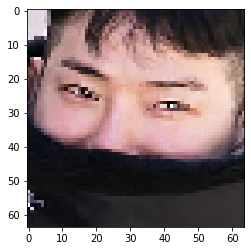

In [31]:
img=cv2.imread(os.path.join('/content/drive/My Drive/mask_dataset/test/with_mask_test',with_mask_test[10]),cv2.IMREAD_COLOR)
img=cv2.resize(img,(64,64),interpolation = cv2.INTER_CUBIC)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
z= np.zeros((1,64,64,3))
z[0]=RGB_img
print(classifier.predict(z))

#CHANGE THE NUMBER IN THE LIST with_mask_test, TO CHECK FOR OTHER IMAGES

# Predicting ONE for without Mask

[[1.]]


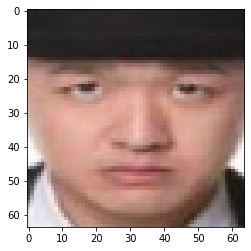

In [32]:
img=cv2.imread(os.path.join('/content/drive/My Drive/mask_dataset/test/without_mask_test',without_mask_test[3]),cv2.IMREAD_COLOR)
img=cv2.resize(img,(64,64),interpolation = cv2.INTER_CUBIC)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
z= np.zeros((1,64,64,3))
z[0]=RGB_img
print(classifier.predict(z))

#CHANGE THE NUMBER IN THE LIST with_mask_test, TO CHECK FOR OTHER IMAGES

# To take live photo and test:

In [33]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
img=cv2.imread('/content/photo.jpg',cv2.IMREAD_COLOR)
img=cv2.resize(img,(64,64),interpolation = cv2.INTER_CUBIC)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)
z= np.zeros((1,64,64,3))
z[0]=RGB_img
print(classifier.predict(z))